<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Assignment: Notebook for Peer Assignment

Estimated time needed: 60 minutes


# Introduction

This project relates to the NOAA Weather Dataset - JFK Airport (New York). The original dataset contains 114,546 hourly observations of 12 local climatological variables (such as temperature and wind speed) collected at JFK airport. This dataset can be obtained for free from the IBM Developer [Data Asset Exchange](https://developer.ibm.com/exchanges/data/all/jfk-weather-data/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0151ENSkillsNetwork21582452-2021-01-01).

For this project, you will be using a subset dataset, which contains 5727 rows (about 5% or original rows) and 9 columns. The end goal will be to predict the precipitation using some of the available features. In this project, you will practice reading data files, preprocessing data, creating models, improving models and evaluating them to ultimately choose the best model.


In [1]:
# Install tidymodels if you haven't done so
install.packages("rlang")
install.packages("tidymodels")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
# Library for modeling
library(tidymodels)

# Load tidyverse
library(tidyverse)

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──
✔ broom        1.0.0     ✔ recipes      1.0.1
✔ dials        1.0.0     ✔ rsample      1.0.0
✔ dplyr        1.0.9     ✔ tibble       3.1.8
✔ ggplot2      3.3.6     ✔ tidyr        1.2.0
✔ infer        1.0.2     ✔ tune         1.0.0
✔ modeldata    1.0.0     ✔ workflows    1.0.0
✔ parsnip      1.0.0     ✔ workflowsets 1.0.0
✔ purrr        0.3.4     ✔ yardstick    1.0.0
── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ stringr 1.4.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() mask

In [3]:
# url where the data is located
url <- "https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-sample-data.tar.gz"
# download the file
download.file(url, destfile = "noaa-weather-sample-data.tar.gz")


Untar the zipped file.


In [4]:
# untar the file so we can get the csv only
untar("noaa-weather-sample-data.tar.gz", tar = "internal")

Warning message in untar2(tarfile, files, list, exdir, restore_times):
“using pax extended headers”

<a id="cell2"></a>

## 2. Extract and Read into Project

We start by reading in the raw dataset. You should specify the file name as "noaa-weather-sample-data/jfk_weather_sample.csv".


In [5]:
# read_csv only 
weather_data <- read_csv("noaa-weather-sample-data/jfk_weather_sample.csv",
                     col_types = cols(
                      "HOURLYDewPointTempF" = col_number(),
                      "HOURLYRelativeHumidity" = col_number()
                    ))

Next, display the first few rows of the dataframe.


In [6]:
head(weather_data)

DATE,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYPrecip,HOURLYWindSpeed,HOURLYSeaLevelPressure,HOURLYStationPressure
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2015-07-25 13:51:00,60,46,83,68,0.00,13,30.01,29.99
2016-11-18 23:51:00,34,48,53,44,0.00,6,30.05,30.03
2013-01-06 08:51:00,33,89,36,35,0.00,13,30.14,30.12
2011-01-27 16:51:00,18,48,36,30,0.00,14,29.82,29.80
2015-01-03 12:16:00,27,61,39,34,T,11,NA,30.50
2013-02-15 20:51:00,35,79,41,38,0.00,6,29.94,29.92


Also, take a `glimpse` of the dataset to see the different column data types and make sure it is the correct subset dataset with about 5700 rows and 9 columns.


In [7]:
glimpse(weather_data)

Rows: 5,727
Columns: 9
$ DATE                   <dttm> 2015-07-25 13:51:00, 2016-11-18 23:51:00, 2013…
$ HOURLYDewPointTempF    <dbl> 60, 34, 33, 18, 27, 35, 4, 14, 51, 71, 76, 19, …
$ HOURLYRelativeHumidity <dbl> 46, 48, 89, 48, 61, 79, 51, 65, 90, 94, 79, 37,…
$ HOURLYDRYBULBTEMPF     <dbl> 83, 53, 36, 36, 39, 41, 19, 24, 54, 73, 83, 44,…
$ HOURLYWETBULBTEMPF     <dbl> 68, 44, 35, 30, 34, 38, 15, 21, 52, 72, 78, 35,…
$ HOURLYPrecip           <chr> "0.00", "0.00", "0.00", "0.00", "T", "0.00", "0…
$ HOURLYWindSpeed        <dbl> 13, 6, 13, 14, 11, 6, 0, 11, 11, 5, 21, 7, 17, …
$ HOURLYSeaLevelPressure <dbl> 30.01, 30.05, 30.14, 29.82, NA, 29.94, 30.42, 3…
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.40…


In [8]:
modified_weather_data <- weather_data[c(3, 4, 6, 7, 9)]
modified_weather_data

HOURLYRelativeHumidity,HOURLYDRYBULBTEMPF,HOURLYPrecip,HOURLYWindSpeed,HOURLYStationPressure
<dbl>,<dbl>,<chr>,<dbl>,<dbl>
46,83,0.00,13,29.99
48,53,0.00,6,30.03
89,36,0.00,13,30.12
48,36,0.00,14,29.80
61,39,T,11,30.50
79,41,0.00,6,29.92
51,19,0.00,0,30.40
65,24,0.00,11,30.35
90,54,0.06,11,30.03


Show the first 10 rows of this new dataframe.


In [9]:
modified_weather_data[1:10, ]

HOURLYRelativeHumidity,HOURLYDRYBULBTEMPF,HOURLYPrecip,HOURLYWindSpeed,HOURLYStationPressure
<dbl>,<dbl>,<chr>,<dbl>,<dbl>
46,83,0.00,13,29.99
48,53,0.00,6,30.03
89,36,0.00,13,30.12
48,36,0.00,14,29.80
61,39,T,11,30.50
79,41,0.00,6,29.92
51,19,0.00,0,30.40
65,24,0.00,11,30.35
90,54,0.06,11,30.03


In [10]:
unique(modified_weather_data$HOURLYPrecip)

[1] "0.00"  "T"     "0.06"  NA      "0.03"  "0.02"  "0.08"  "0.01"  "0.07" 
[10] "0.16"  "0.09"  "0.22"  "0.02s" "0.24"  "0.18"  "0.05"  "0.04"  "0.09s"
[19] "0.11"  "0.14"  "0.25"  "0.10"  "0.01s" "0.58"  "0.12"  "0.13"  "0.46" 
[28] "1.07"  "1.19"  "0.34"  "0.20"  "0.36s" "0.42"  "0.17"  "0.27"  "0.35" 
[37] "0.31"  "0.33"  "0.23"  "0.26"  "0.28"  "0.75"  "0.19"  "0.36"  "0.03s"
[46] "0.07s" "0.54"  "0.59"  "0.21"

In [11]:
weather_data_new <- modified_weather_data %>% mutate(HOURLYPrecip = str_replace(string = HOURLYPrecip, pattern = "T$", replacement = "0.00")) 

In [12]:
weather_data_new_2 <- weather_data_new %>% mutate(HOURLYPrecip = str_remove(string = HOURLYPrecip, pattern = "s$")) 

In [13]:
weather_data_new_2$HOURLYPrecip <- as.numeric(weather_data_new_2$HOURLYPrecip)

In [24]:
#weather_data_new_2 %>% drop_na()

In [15]:
glimpse(weather_data_new_2)

Rows: 5,727
Columns: 5
$ HOURLYRelativeHumidity <dbl> 46, 48, 89, 48, 61, 79, 51, 65, 90, 94, 79, 37,…
$ HOURLYDRYBULBTEMPF     <dbl> 83, 53, 36, 36, 39, 41, 19, 24, 54, 73, 83, 44,…
$ HOURLYPrecip           <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,…
$ HOURLYWindSpeed        <dbl> 13, 6, 13, 14, 11, 6, 0, 11, 11, 5, 21, 7, 17, …
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.40…


In [26]:
class(weather_data_new_2$HOURLYPrecip)

[1] "numeric"

In [16]:
modified_weather_data_new <- as.data.frame(weather_data_new_2)
modified_weather_data_new <-  modified_weather_data_new [is.finite(rowSums(modified_weather_data_new )),]

In [17]:
modified_weather_data_new <- weather_data_new_2 %>% rename('relative_humidity'= 'HOURLYRelativeHumidity', 'dry_bulb_temp_f' = 'HOURLYDRYBULBTEMPF', 'precip' = 'HOURLYPrecip', 'wind_speed' = 'HOURLYWindSpeed', 'station_pressure' = 'HOURLYStationPressure')
colnames(modified_weather_data_new)

[1] "relative_humidity" "dry_bulb_temp_f"   "precip"           
[4] "wind_speed"        "station_pressure"

In [18]:
modified_weather_data_new <- modified_weather_data_new %>% filter (precip != "NA")

In [19]:
glimpse(modified_weather_data_new)

Rows: 4,067
Columns: 5
$ relative_humidity <dbl> 46, 48, 89, 48, 61, 79, 51, 65, 90, 37, 72, 47, 84, …
$ dry_bulb_temp_f   <dbl> 83, 53, 36, 36, 39, 41, 19, 24, 54, 44, 57, 78, 75, …
$ precip            <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.06…
$ wind_speed        <dbl> 13, 6, 13, 14, 11, 6, 0, 11, 11, 7, 17, 8, 3, 11, 13…
$ station_pressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.40, 30.…


In [20]:
set.seed(1234)
weather_data_split<- initial_split(modified_weather_data_new, prop = 0.8)
train_data <- training(weather_data_split)
test_data <- testing(weather_data_split)

Next, looking at just the **training set**, plot histograms or box plots of the variables (`relative_humidity`, `dry_bulb_temp_f`, `precip`, `wind_speed`,  `station_pressure`) for an intial look of their distributions using `tidyverse`'s `ggplot`. Leave the testing set as is because it is good practice to not see the testing set until evaluating the final model.


Warning message:
“Ignoring unknown parameters: stat_bin”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


Warning message:
“Ignoring unknown parameters: stat_bin”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


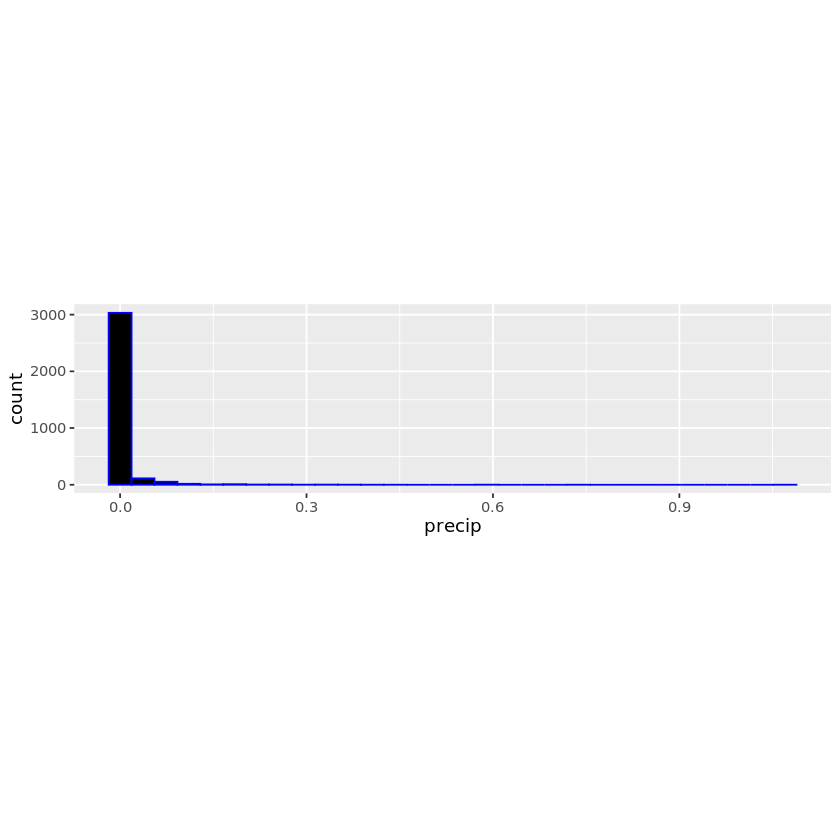

Warning message:
“Ignoring unknown parameters: stat_bin”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


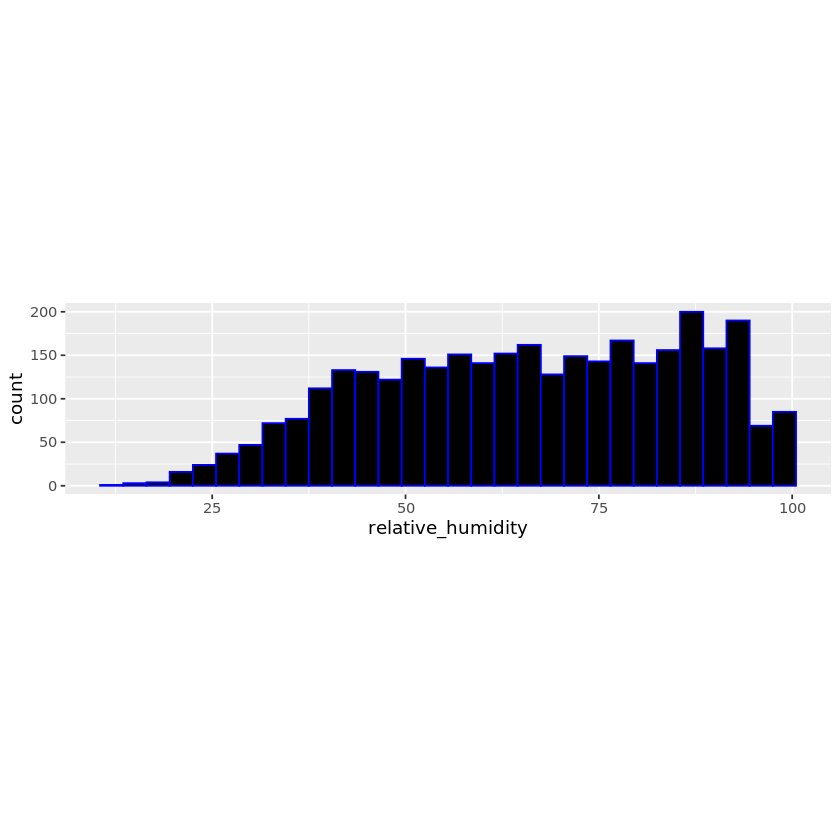

Warning message:
“Ignoring unknown parameters: stat_bin”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


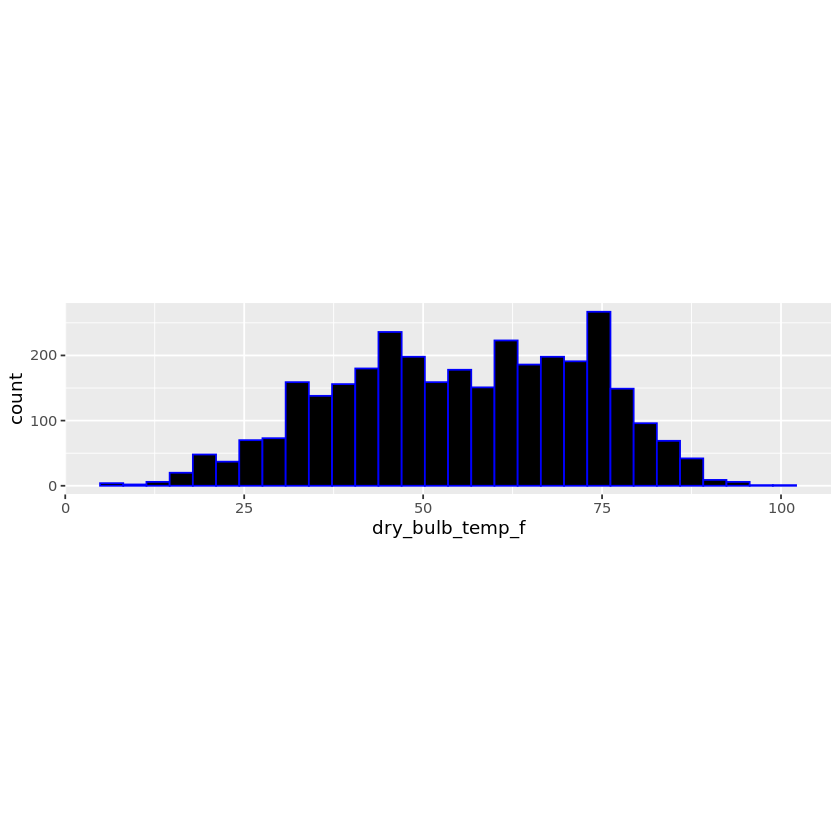

Warning message:
“Ignoring unknown parameters: stat_bin”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”

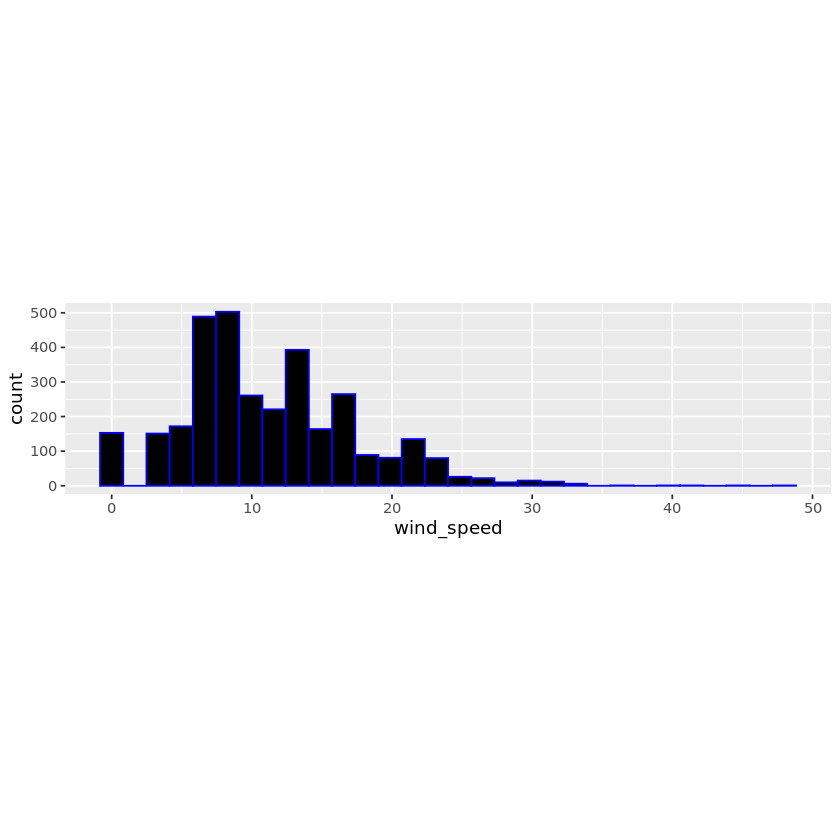

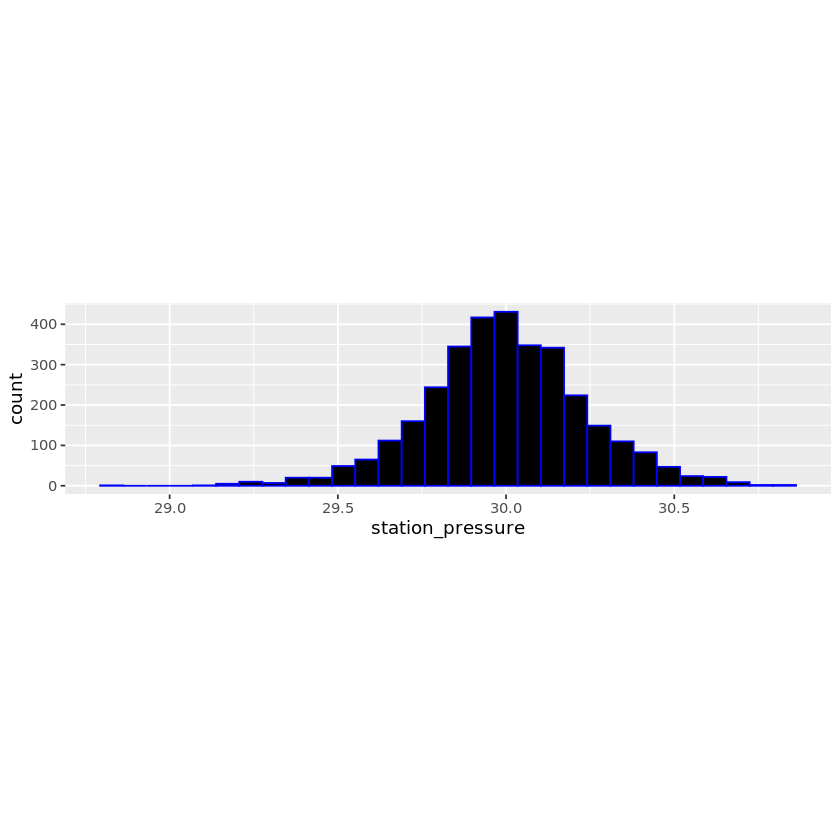

In [21]:
ggplot(data = train_data, aes(x = precip)) + geom_histogram (stat_bin= 100, color = "blue", fill ="black") + theme(aspect.ratio = .25) 
ggplot(data = train_data, aes(x = relative_humidity)) + geom_histogram (stat_bin= 100, color = "blue", fill ="black") + theme(aspect.ratio = .25) 
ggplot(data = train_data, aes(x = dry_bulb_temp_f)) + geom_histogram (stat_bin= 100, color = "blue", fill ="black") + theme(aspect.ratio = .25) 
ggplot(data = train_data, aes(x = wind_speed)) + geom_histogram (stat_bin= 100, color = "blue", fill ="black") + theme(aspect.ratio = .25) 
ggplot(data = train_data, aes(x = station_pressure)) + geom_histogram (stat_bin= 100, color = "blue", fill ="black") + theme(aspect.ratio = .25) 


In [22]:
lm_spec <- linear_reg() %>%  #pick linear rigression
  set_engine(engine = "lm")  # set engine
lm_spec
train_fit_1 <- lm_spec %>%  fit(precip ~ relative_humidity, data = modified_weather_data_new )
train_fit_1
train_fit_2 <- lm_spec %>%  fit(precip ~ wind_speed, data = modified_weather_data_new )
train_fit_2 
train_fit_3 <- lm_spec %>%  fit(precip ~ station_pressure, data = modified_weather_data_new )
train_fit_3 
train_fit_4 <- lm_spec %>%  fit(precip ~ dry_bulb_temp_f, data = modified_weather_data_new )
train_fit_4 

Linear Regression Model Specification (regression)

Computational engine: lm 


parsnip model object


Call:
stats::lm(formula = precip ~ relative_humidity, data = data)

Coefficients:
      (Intercept)  relative_humidity  
       -0.0204478          0.0004093  


parsnip model object


Call:
stats::lm(formula = precip ~ wind_speed, data = data)

Coefficients:
(Intercept)   wind_speed  
   0.000713     0.000518  


parsnip model object


Call:
stats::lm(formula = precip ~ station_pressure, data = data)

Coefficients:
     (Intercept)  station_pressure  
         0.70814          -0.02339  


parsnip model object


Call:
stats::lm(formula = precip ~ dry_bulb_temp_f, data = data)

Coefficients:
    (Intercept)  dry_bulb_temp_f  
      5.024e-03        2.749e-05  


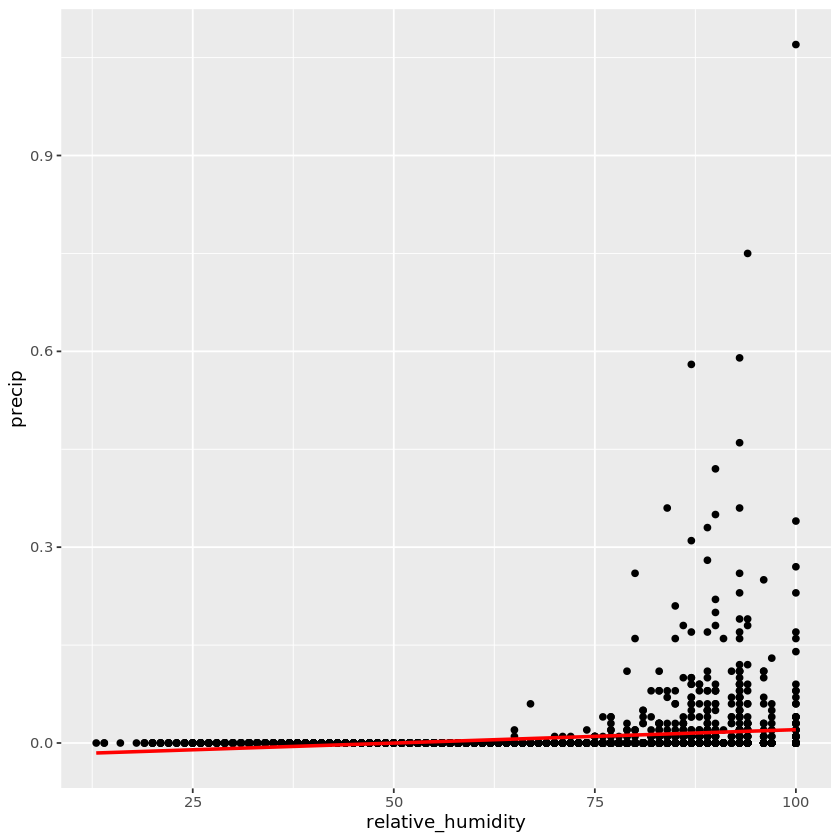

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 4 rows containing missing values (geom_point).”

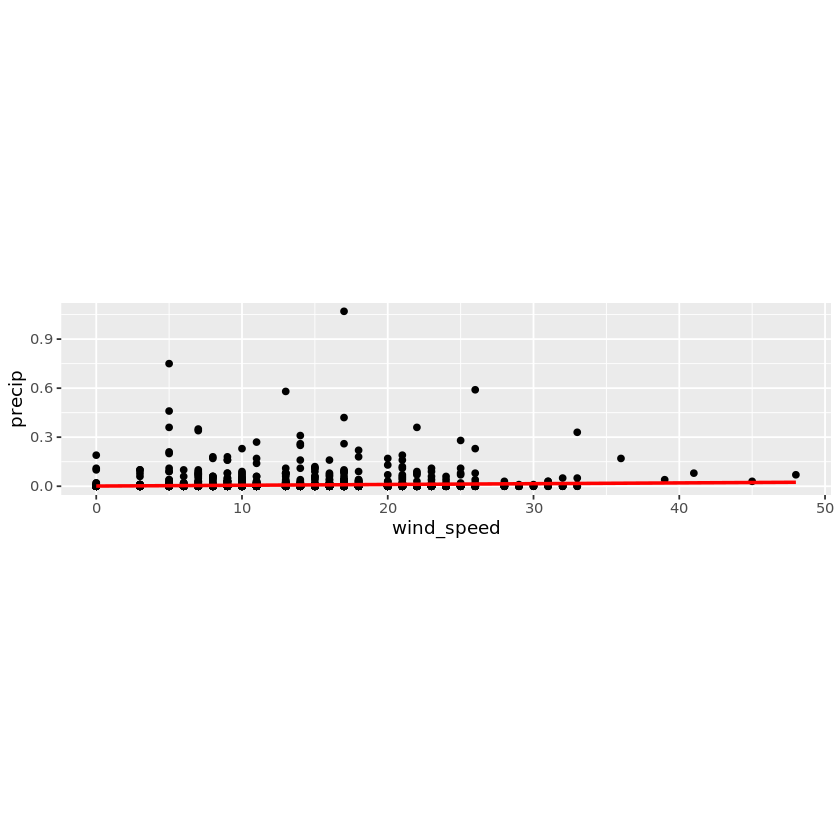

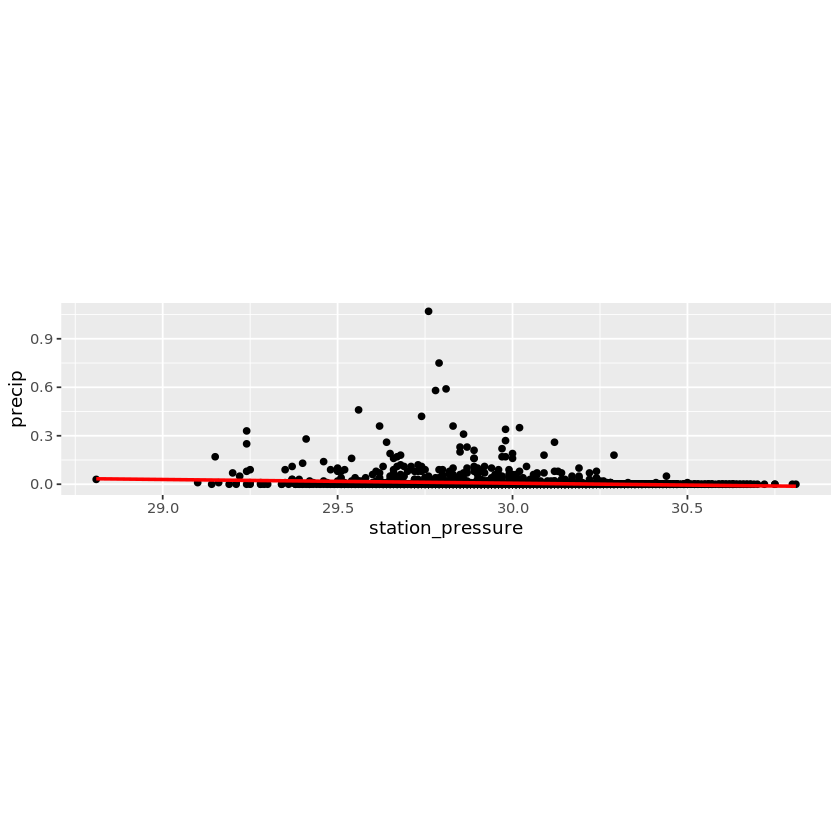

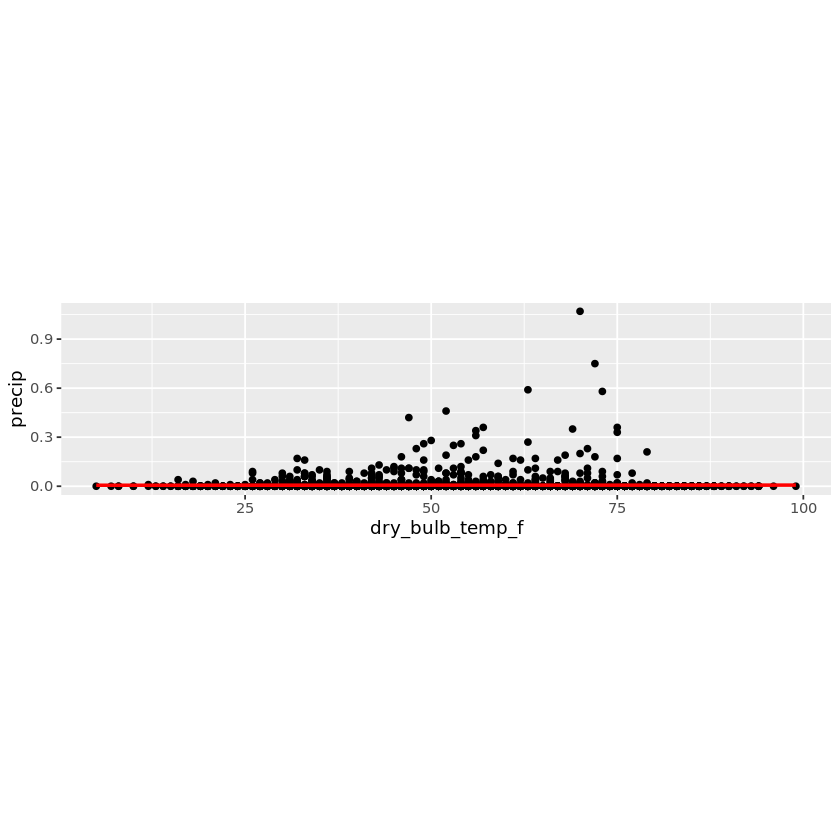

In [23]:
ggplot(train_data, aes(x = relative_humidity, y = precip)) + geom_point() + geom_smooth(method = "lm", formula = y ~ x, col = "red", se = FALSE) 
ggplot(train_data, aes(x = wind_speed, y = precip)) + geom_point() + geom_smooth(method = "lm", formula = y ~ x, col = "red", se = FALSE)  + theme(aspect.ratio = .25)
ggplot(train_data, aes(x = station_pressure, y = precip)) + geom_point() + geom_smooth(method = "lm", formula = y ~ x, col = "red", se = FALSE)  + theme(aspect.ratio = .25)
ggplot(train_data, aes(x = dry_bulb_temp_f, y = precip)) + geom_point() + geom_smooth(method = "lm", formula = y ~ x, col = "red", se = FALSE)  + theme(aspect.ratio = .25)

In [33]:
train_mlr<- lm(precip ~ dry_bulb_temp_f + station_pressure, data = modified_weather_data_new)
predict_mlr <- predict(train_mlr, new_data = train_data, interval = "confidence")
head(predict_mlr)

,fit,lwr,upr
1,0.005538053,0.003114795,0.007961311
2,0.005825956,0.004533859,0.007118053
3,0.004371759,0.002423709,0.006319809
4,0.012058136,0.009703154,0.014413118
5,-0.004880683,-0.007920102,-0.001841264
6,0.008967628,0.007191013,0.010744243


In [34]:
model_2 <- lm(precip ~ poly(dry_bulb_temp_f, 4, raw = TRUE), data = train_data)
#model_2
summary(model_2)$r.squared #R squared value is 1.8%
mse_mlr <- mean(model_2$residual^2)
mse_mlr
rmse <- sqrt(mse_mlr)
rmse

[1] 0.003628051

[1] 0.001529891

[1] 0.03911382

In [36]:
wheather_recipe <-
  recipe(precip ~ ., data = train_data)

In [37]:
ridge_spec <- linear_reg(penalty = 0.1, mixture = 0) %>%
  set_engine("glmnet")

In [38]:
ridge_wf <- workflow() %>%
  add_recipe(wheather_recipe)

In [39]:
ridge_fit <- ridge_wf %>%
  add_model(ridge_spec) %>%
  fit(data = train_data)

ERROR: Error in elnet(x, is.sparse, ix, jx, y, weights, offset, type.gaussian, : NA/NaN/Inf in foreign function call (arg 5)


In [27]:
ridge_fit %>%
  pull_workflow_fit() %>%
  tidy()

Warning message:
“`pull_workflow_fit()` was deprecated in workflows 0.2.3.
Please use `extract_fit_parsnip()` instead.”Loading required package: Matrix

Attaching package: ‘Matrix’

The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack

Loading required package: foreach

Attaching package: ‘foreach’

The following objects are masked from ‘package:purrr’:

    accumulate, when

Loaded glmnet 2.0-18



term,estimate,penalty
<chr>,<dbl>,<dbl>
(Intercept),2.74354584,0.1
DepDelayMinutes,0.62721460,0.1
CarrierDelay,0.29353616,0.1
WeatherDelay,0.31756011,0.1
NASDelay,0.55546064,0.1
SecurityDelay,0.05339743,0.1
LateAircraftDelay,0.28670982,0.1
DayOfWeek,0.20576951,0.1
Month,-0.07699068,0.1


## Author(s)

<h4> Yiwen Li </h4>

## Contributions

<h4> Tiffany Zhu </h4>

## <h3 align="center"> © IBM Corporation 2021. All rights reserved. <h3/>
